# MULTIPLE LINEAR REGRESSION

# Importing Libraries & Uploading Data

In [1]:
#pip install word2number

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from word2number import w2n
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import warnings
warnings.filterwarnings('ignore')
hire=pd.read_csv(r"C:\Users\WELCOME\Documents\Data Science\hiring.csv")
hire

,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


# Preprocessing the Data

In [3]:
hire.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary                        0
dtype: int64

In [4]:
hire.experience.fillna('zero',inplace=True)
hire

,experience,test_score(out of 10),interview_score(out of 10),salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
hire["experience"]=hire["experience"].apply(w2n.word_to_num)
hire

,experience,test_score(out of 10),interview_score(out of 10),salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [6]:
hire.isna().sum()

experience                    0
test_score(out of 10)         1
interview_score(out of 10)    0
salary                        0
dtype: int64

In [7]:
hire['test_score(out of 10)']=hire['test_score(out of 10)'].fillna(hire['test_score(out of 10)'].mean())
hire

,experience,test_score(out of 10),interview_score(out of 10),salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


# Plotting

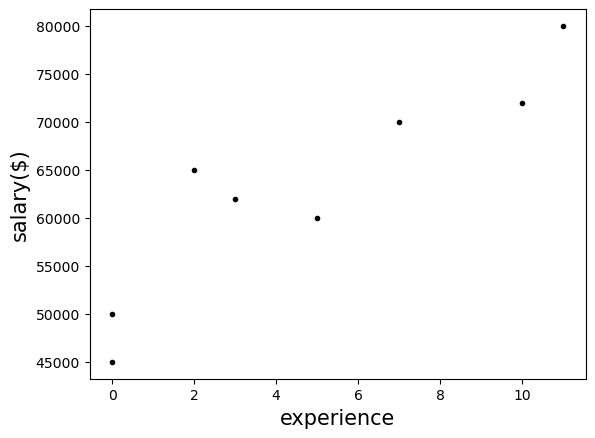

In [10]:
plt.xlabel('experience',fontsize=15)
plt.ylabel('salary($)',fontsize=15)
plt.scatter(hire.experience,hire.salary,marker='.',color='black')

# Splitting X & Y

In [11]:
x=hire.drop('salary',axis=1)
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [12]:
y=hire['salary']
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64

# Calling train_test_split

In [13]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.7,random_state=2)

# Calling LinearRegression()

In [19]:
reg=LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

# Train & Test Score

In [21]:
reg.score(train_x,train_y)

0.9836546254422937

In [22]:
reg.score(test_x,test_y)

0.9315043691558889

# 1. 2 yr experience, 9 test score, 6 interview score.

In [23]:
reg.predict([[2,9,6]])

array([52878.6545925])

# 2. 12 yr experience, 10 test score, 10 interview score.

In [24]:
reg.predict([[12,10,10]])

array([94006.98576973])

# Pickle File creation

In [26]:
import pickle
with open('Hiring_Pickle_File.pkl','wb') as file:
    pickle.dump(reg,file)
print('Model saved into Hiring Pickle')

Model saved into Hiring Pickle
